<a href="https://colab.research.google.com/github/mselmasry/Dojo-Project2/blob/main/Project02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import multiprocessing as mp

url1 = 'https://media.githubusercontent.com/media/mselmasry/Dojo-Project2/main/creditcard.csv'
url2 = 'https://raw.githubusercontent.com/mselmasry/Dojo-Project2/main/Retail_Dataset2.csv'
Dataset1Source = 'The source of the data is: https://www.kaggle.com/mlg-ulb/creditcardfraud, It is Credit Card Fraud Data'
Dataset2Source = 'The source of the data is: https://www.kaggle.com/tevecsystems/retail-sales-forecasting , It is used for forecasting retail demand'

In [5]:
cc_df = pd.read_csv(url1)
retail_df = pd.read_csv(url2)

## Dataset 1

In [6]:
print(f'{Dataset1Source}\n')
cc_df.head(2)

The source of the data is: https://www.kaggle.com/mlg-ulb/creditcardfraud, It is Credit Card Fraud Data



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


> The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

>It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

>Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

> Target is **Class**

> Problem is a **Classification** one

In [7]:
print(f'Number of features: {len(cc_df.columns)-1}')

Number of features: 30


In [8]:
print(f'Number of Rows: {len(cc_df)}')

Number of Rows: 284807


## Dataset 2

In [9]:
print(f'{Dataset2Source}\n')
retail_df.head(2)

The source of the data is: https://www.kaggle.com/tevecsystems/retail-sales-forecasting , It is used for forecasting retail demand



,Product_id,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Open,Promo,StateHoliday,SchoolHoliday,Petrol_price
0,786725,Product_0033,Whse_S,Category_005,01/03/2016,16000,1,0,0,0,91
1,786743,Product_1825,Whse_S,Category_006,01/03/2016,50000,1,0,0,0,85


> This **dataset** contains lot of historical sales data. It was extracted from a Brazilian top retailer and has many SKUs and many stores. The data was transformed to protect the identity of the retailer.

> Target is **order_demand**

In [10]:
print(f'Number of features: {len(retail_df.columns)-1}')

Number of features: 10


In [11]:
print(f'Number of Rows: {len(retail_df)}')

Number of Rows: 169211


## Data Cleaning: Credit Card Fraud

In [12]:
cc_df.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


In [13]:
len(cc_df)

284807

In [14]:
cc_df.duplicated().sum()

1081

In [15]:
cc_df.drop_duplicates(inplace=True)

In [16]:
cc_df.duplicated().sum()

0

In [17]:
cc_df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [18]:
corr = cc_df.corr()

In [19]:
print(corr)

            Time        V1        V2  ...       V28    Amount     Class
Time    1.000000  0.117927 -0.010556  ... -0.009305 -0.010559 -0.012359
V1      0.117927  1.000000  0.006875  ... -0.004861 -0.230105 -0.094486
V2     -0.010556  0.006875  1.000000  ...  0.001611 -0.533428  0.084624
V3     -0.422054 -0.008112  0.005278  ... -0.000134 -0.212410 -0.182322
V4     -0.105845  0.002257 -0.001495  ...  0.000231  0.099514  0.129326
V5      0.173223 -0.007036  0.005210  ... -0.000820 -0.387685 -0.087812
V6     -0.063279  0.000413 -0.000594  ...  0.000925  0.216389 -0.043915
V7      0.085335 -0.009173  0.007425  ...  0.001657  0.400408 -0.172347
V8     -0.038203 -0.001168  0.002899  ... -0.000099 -0.104662  0.033068
V9     -0.007861  0.001828 -0.000274  ...  0.005591 -0.044123 -0.094021
V10     0.031068  0.000815  0.000620  ...  0.009159 -0.102255 -0.206971
V11    -0.248536  0.001028 -0.000633  ...  0.002562 -0.000015  0.149067
V12     0.125500 -0.001524  0.002266  ... -0.000613 -0.009254 -0

Moderate->Strong Correlations:
- Amount & V2 -> Positive
- Amount & V5 -> Negative
- Amount & V6 -> Positive
- Amount & V7 -> Positive
- Amount & V20 -> Positive
- Time & V3 -> Positive
- V11 & V12, V14, V16, V17 -> Negative
- V12 & V14, V16, V17, V18 -> Positive
- V18 & V17 -> Positive

In [20]:
cc_df['Class'].value_counts(normalize=True)

0    0.998333
1    0.001667
Name: Class, dtype: float64

CPU times: user 557 ms, sys: 337 ms, total: 894 ms
Wall time: 554 ms


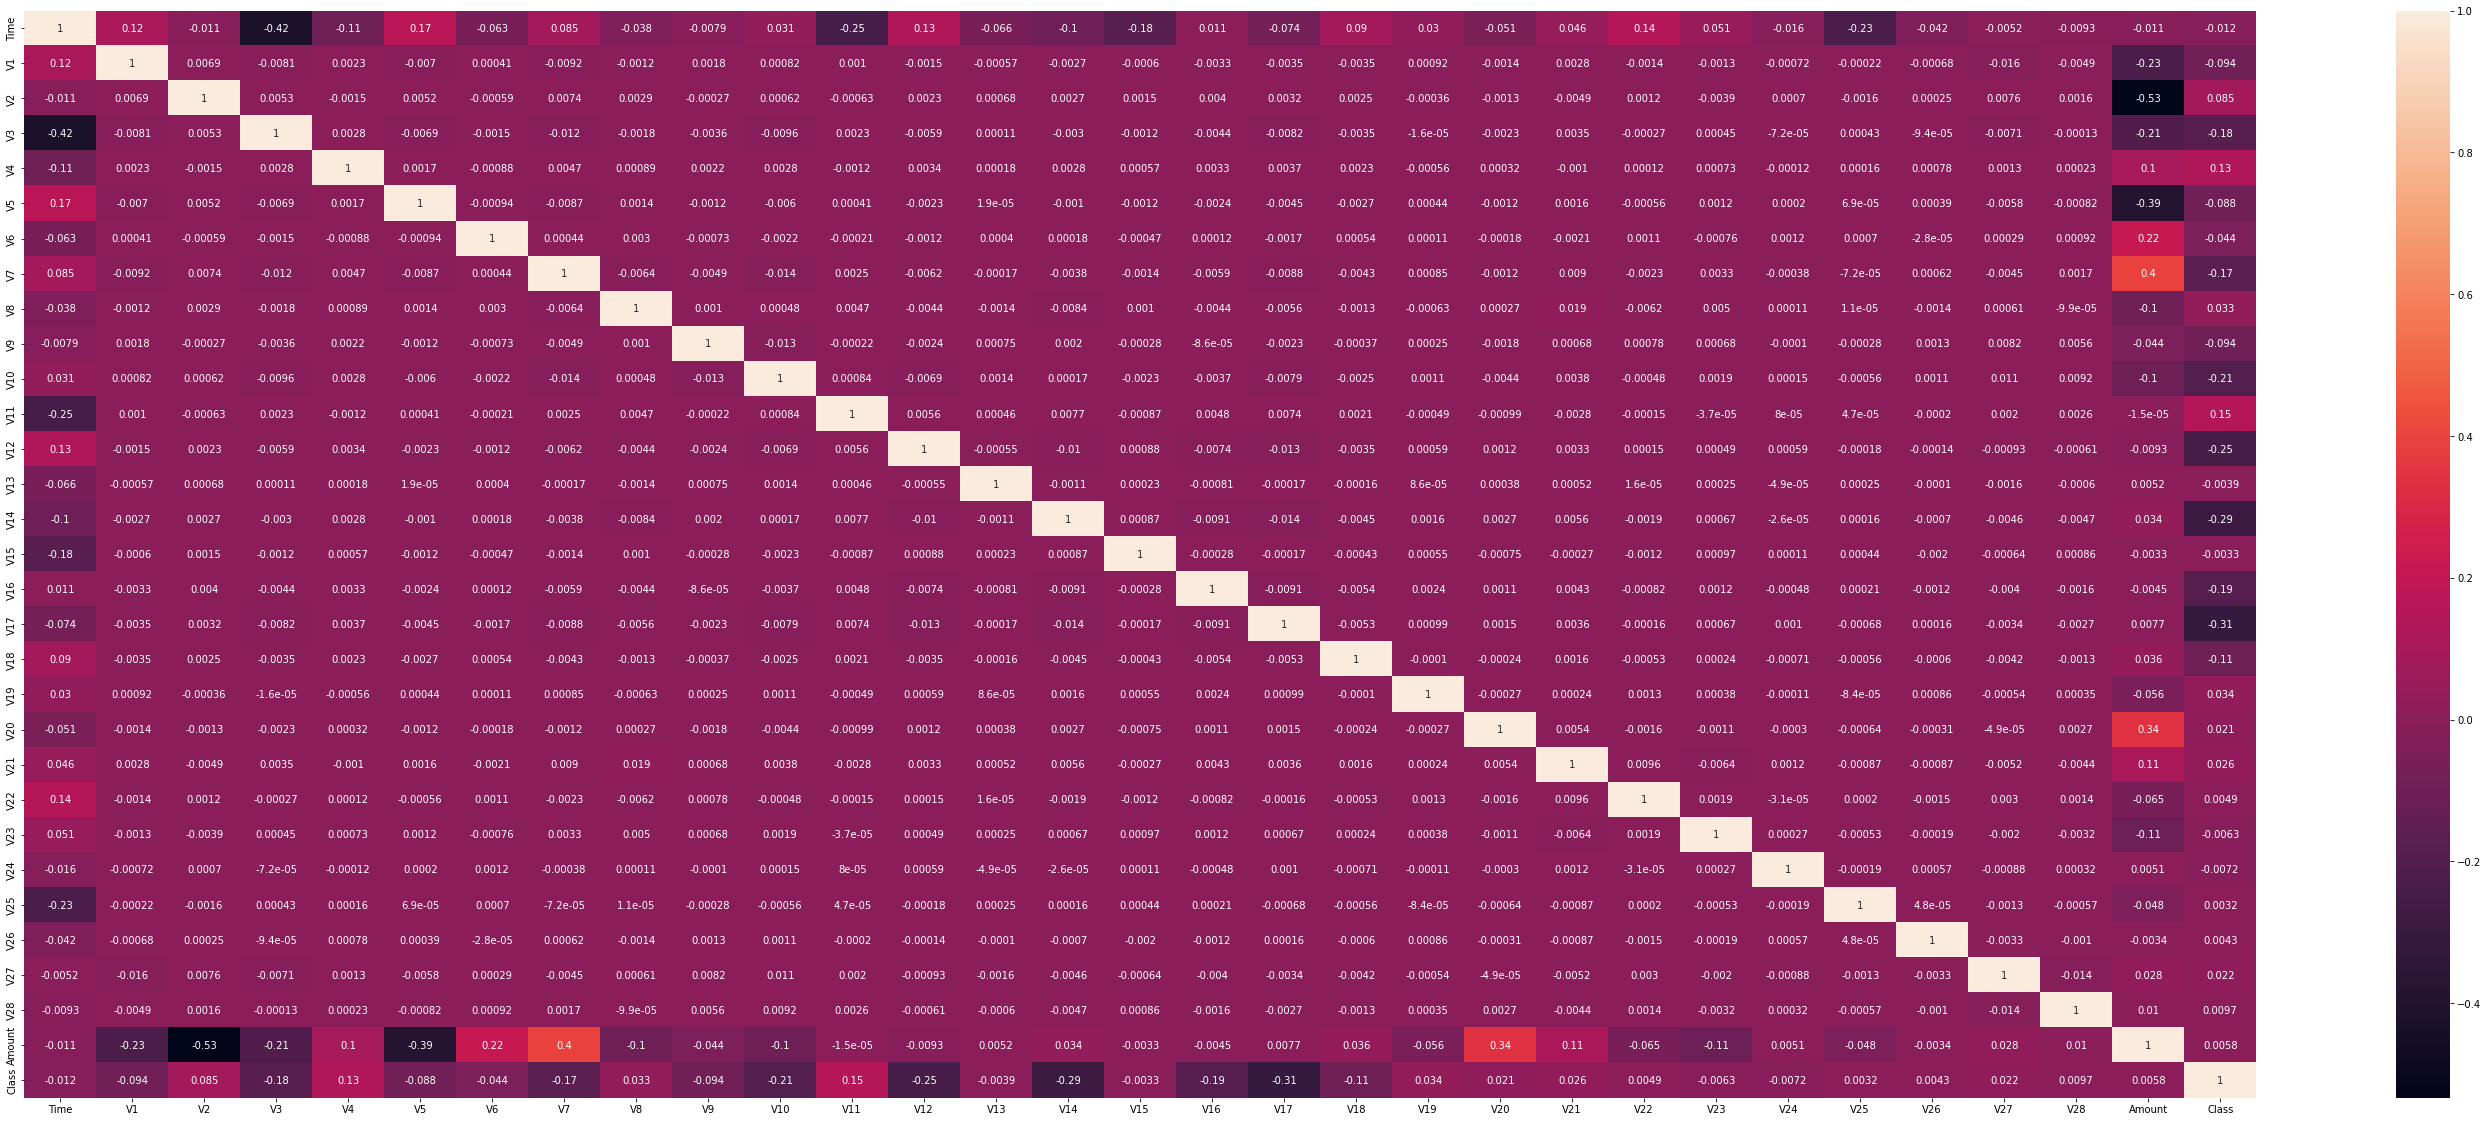

In [21]:
%%time
fig, ax = plt.subplots(figsize=(50,20));
sns.heatmap(corr, annot=True, ax=ax);

In [22]:
#pd.plotting.scatter_matrix(cc_df,figsize=(30,20));

CPU times: user 56.2 ms, sys: 2.97 ms, total: 59.2 ms
Wall time: 60.7 ms


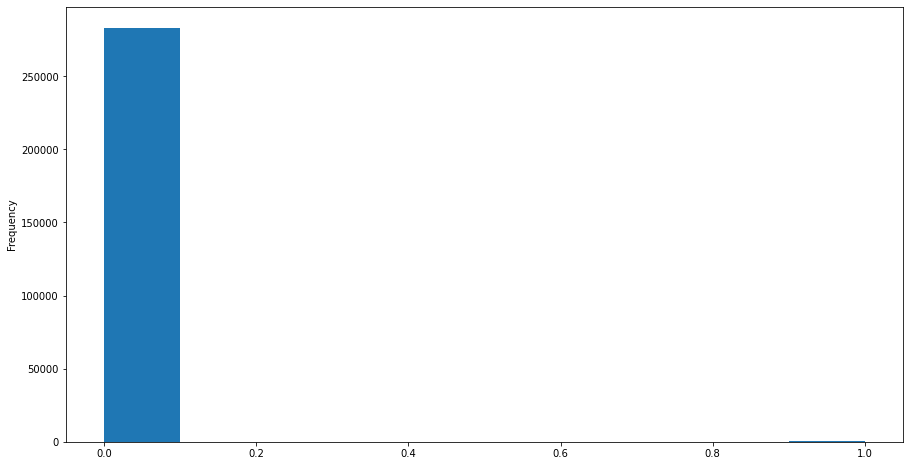

In [23]:
%%time
plt.figure(figsize=(15,8))
cc_df['Class'].plot(kind='hist')

CPU times: user 35.5 ms, sys: 1.04 ms, total: 36.5 ms
Wall time: 37.4 ms


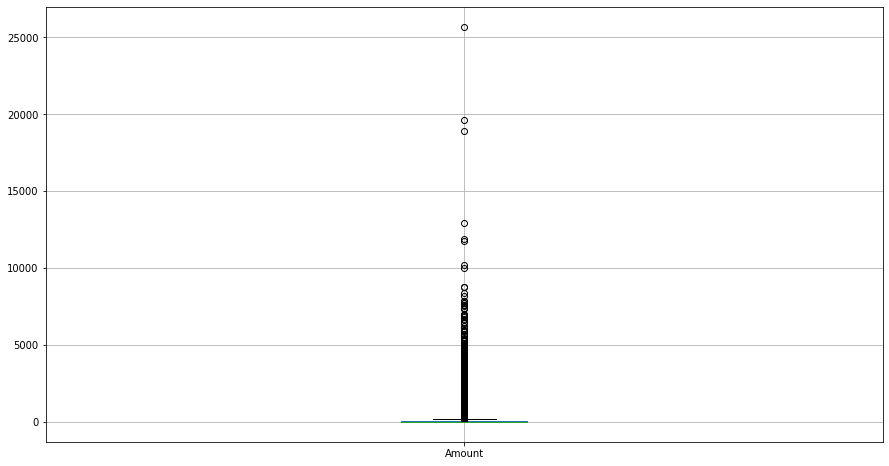

In [24]:
%%time
plt.figure(figsize=(15,8))
cc_df.boxplot(column='Amount')

CPU times: user 36.5 ms, sys: 842 µs, total: 37.4 ms
Wall time: 36.8 ms


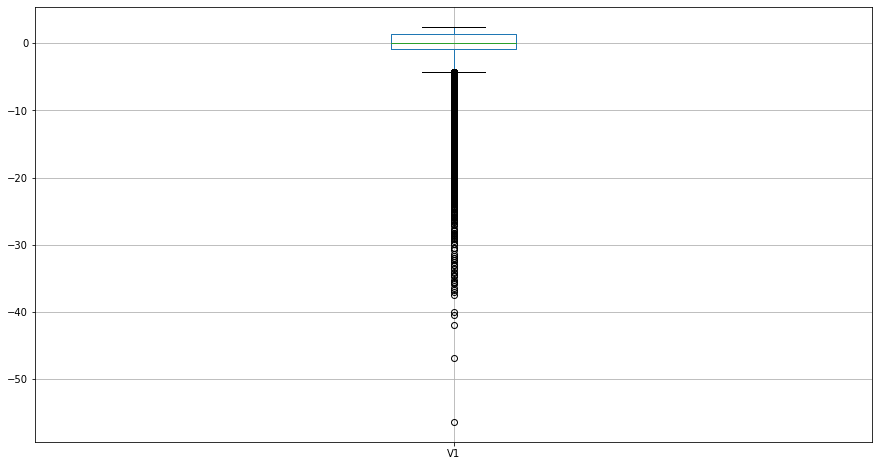

In [25]:
%%time
plt.figure(figsize=(15,8))
cc_df.boxplot(column='V1')

CPU times: user 35.9 ms, sys: 926 µs, total: 36.9 ms
Wall time: 35.9 ms


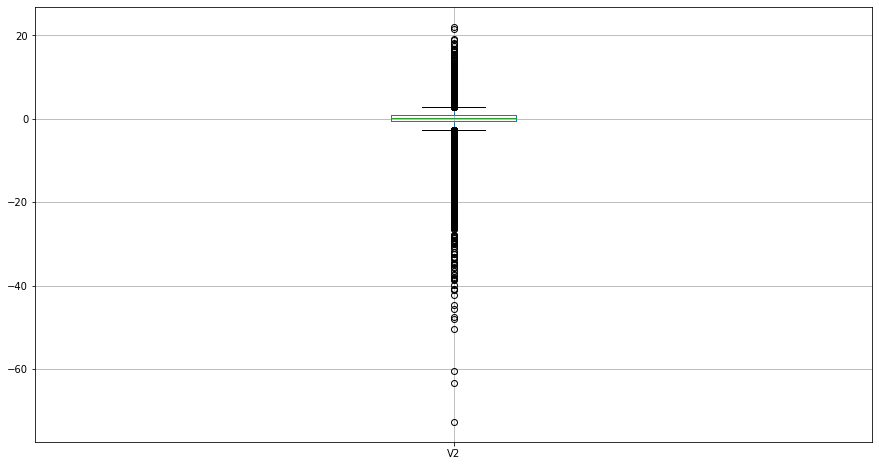

In [26]:
%%time
plt.figure(figsize=(15,8))
cc_df.boxplot(column='V2')

CPU times: user 100 ms, sys: 2.69 ms, total: 103 ms
Wall time: 101 ms


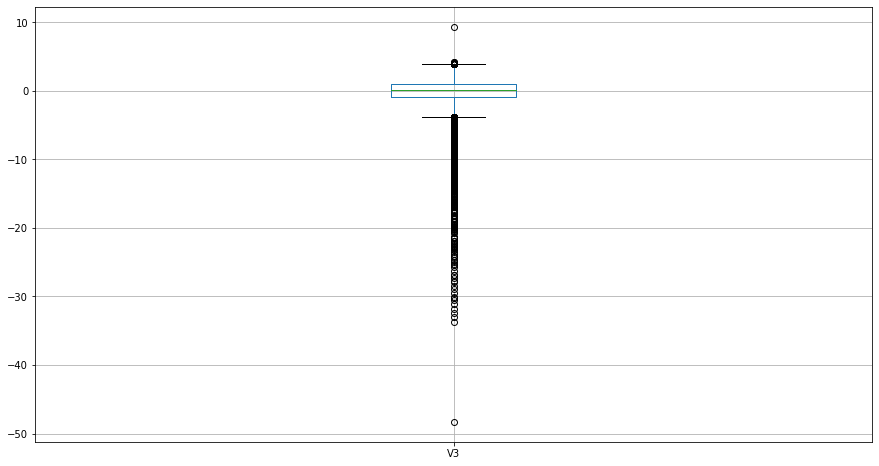

In [27]:
%%time
plt.figure(figsize=(15,8))
cc_df.boxplot(column='V3')

CPU times: user 33.9 ms, sys: 2.32 ms, total: 36.2 ms
Wall time: 34.1 ms


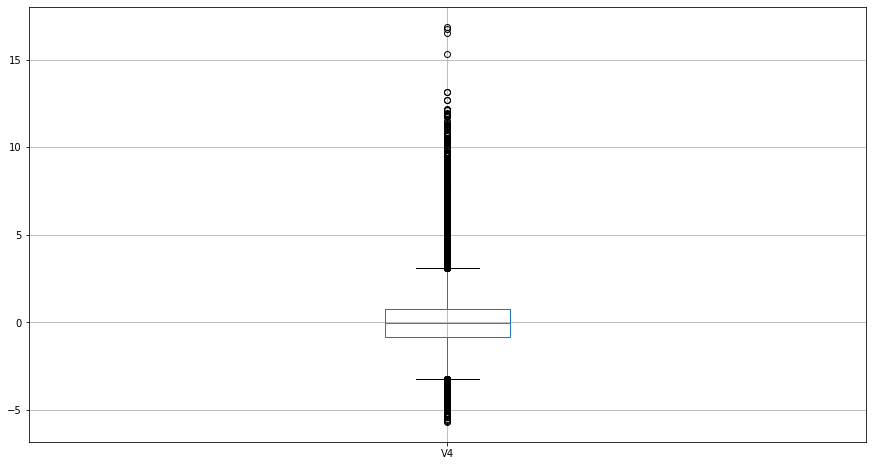

In [28]:
%%time
plt.figure(figsize=(15,8))
cc_df.boxplot(column='V4')

CPU times: user 44.6 ms, sys: 1.61 ms, total: 46.2 ms
Wall time: 39.8 ms


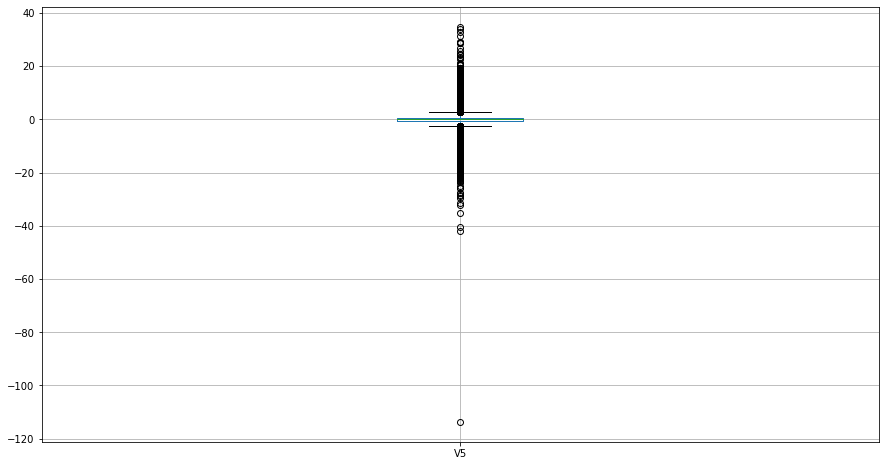

In [29]:
%%time
plt.figure(figsize=(15,8))
cc_df.boxplot(column='V5')

CPU times: user 32.6 ms, sys: 3.09 ms, total: 35.7 ms
Wall time: 34.4 ms


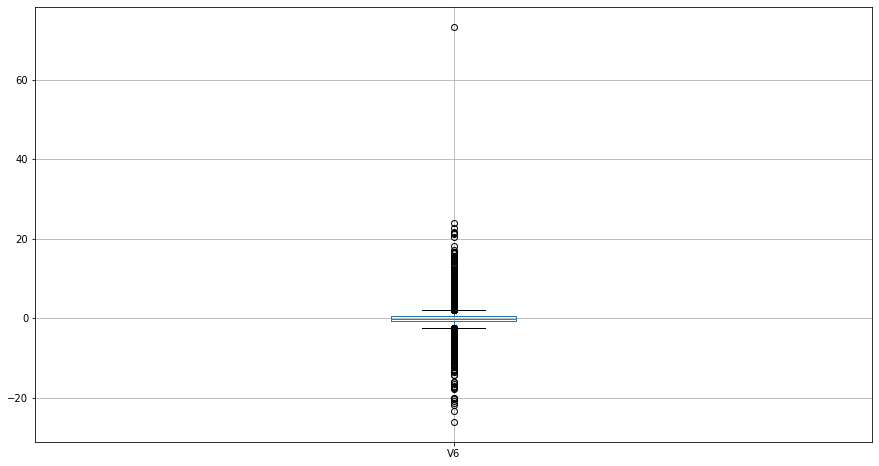

In [30]:
%%time
plt.figure(figsize=(15,8))
cc_df.boxplot(column='V6')

CPU times: user 36.8 ms, sys: 1.27 ms, total: 38 ms
Wall time: 36 ms


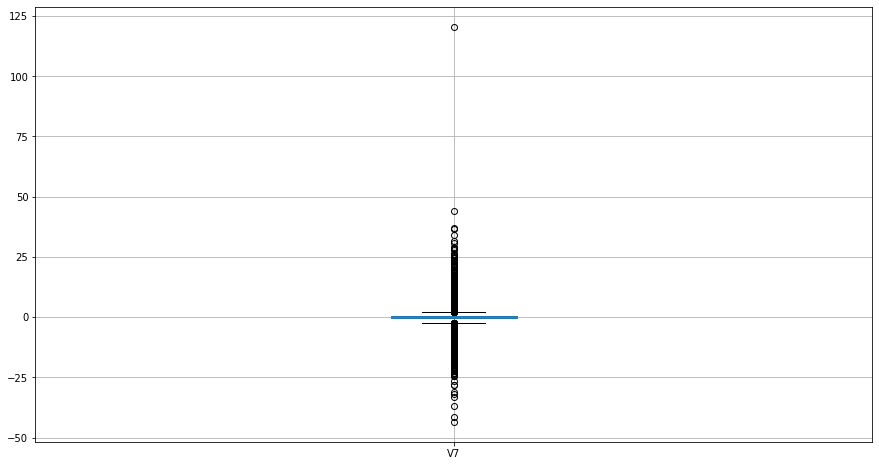

In [31]:
%%time
plt.figure(figsize=(15,8))
cc_df.boxplot(column='V7')

CPU times: user 34.7 ms, sys: 1.91 ms, total: 36.6 ms
Wall time: 34.6 ms


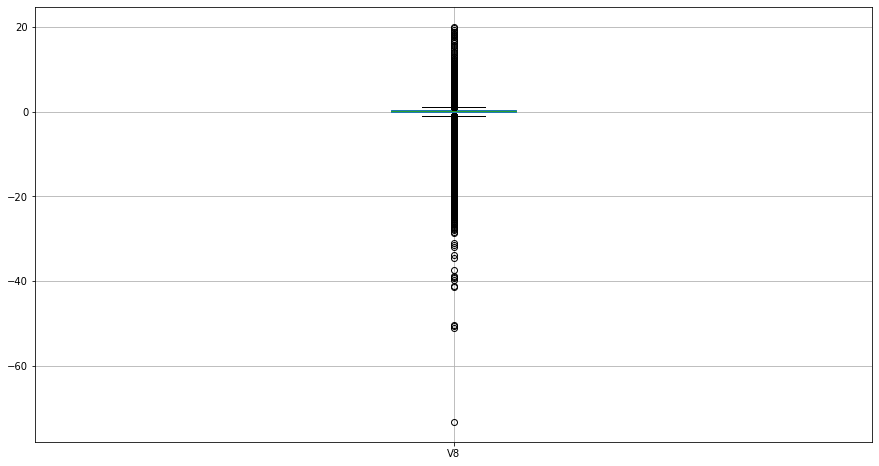

In [32]:
%%time
plt.figure(figsize=(15,8))
cc_df.boxplot(column='V8')

CPU times: user 34.4 ms, sys: 1.19 ms, total: 35.6 ms
Wall time: 33.6 ms


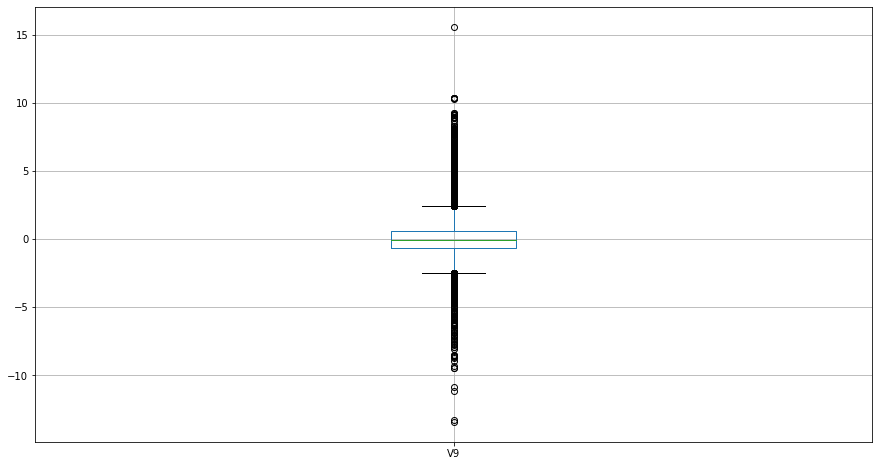

In [33]:
%%time
plt.figure(figsize=(15,8))
cc_df.boxplot(column='V9')

CPU times: user 35.4 ms, sys: 181 µs, total: 35.6 ms
Wall time: 33.9 ms


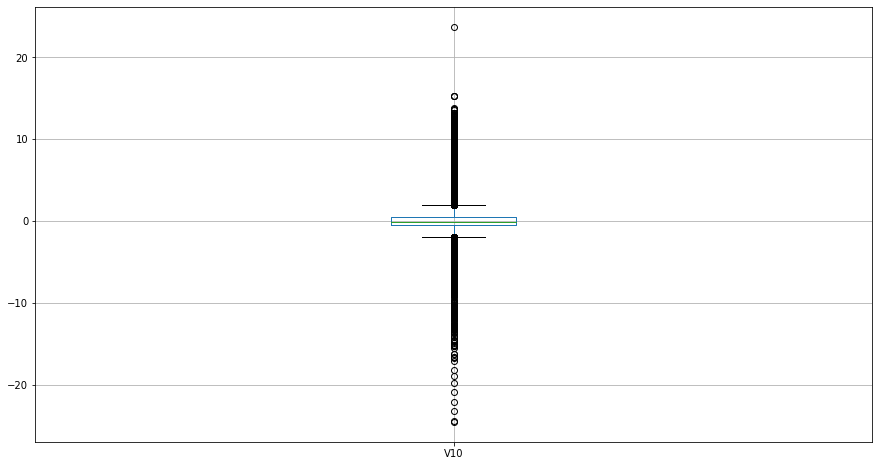

In [34]:
%%time
plt.figure(figsize=(15,8))
cc_df.boxplot(column='V10')

CPU times: user 33.3 ms, sys: 3.2 ms, total: 36.5 ms
Wall time: 34.5 ms


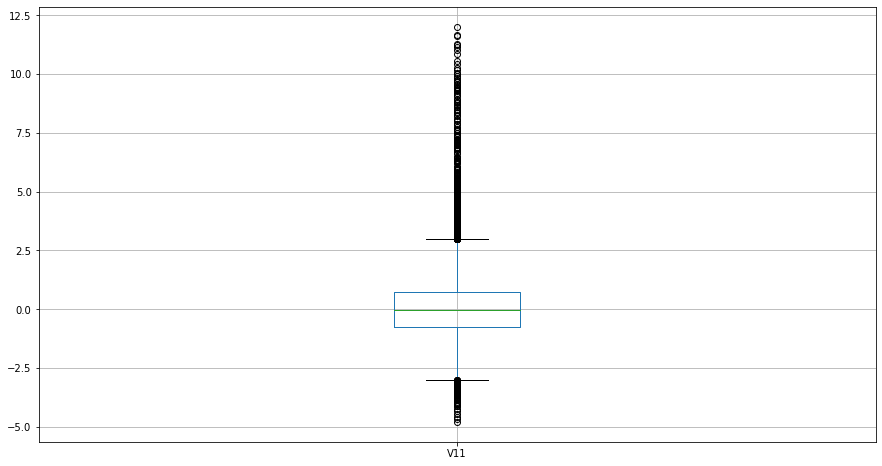

In [35]:
%%time
plt.figure(figsize=(15,8))
cc_df.boxplot(column='V11')

CPU times: user 36 ms, sys: 1.95 ms, total: 37.9 ms
Wall time: 36.7 ms


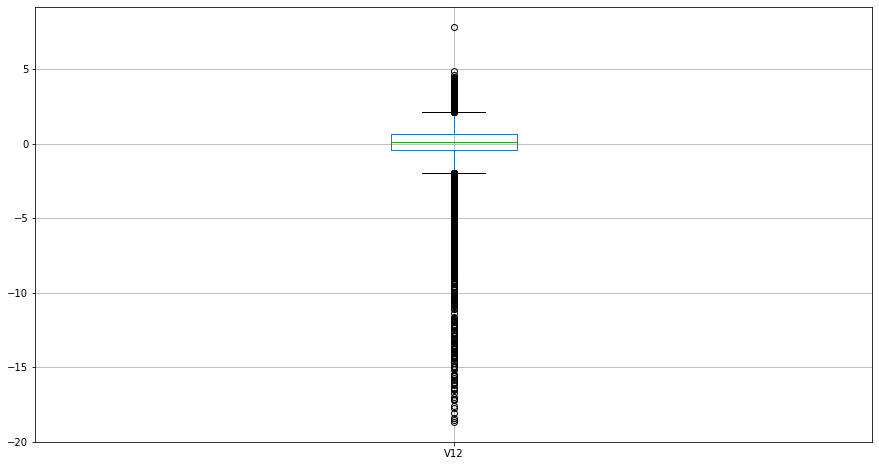

In [36]:
%%time
plt.figure(figsize=(15,8))
cc_df.boxplot(column='V12')

CPU times: user 35.4 ms, sys: 1.01 ms, total: 36.4 ms
Wall time: 34.9 ms


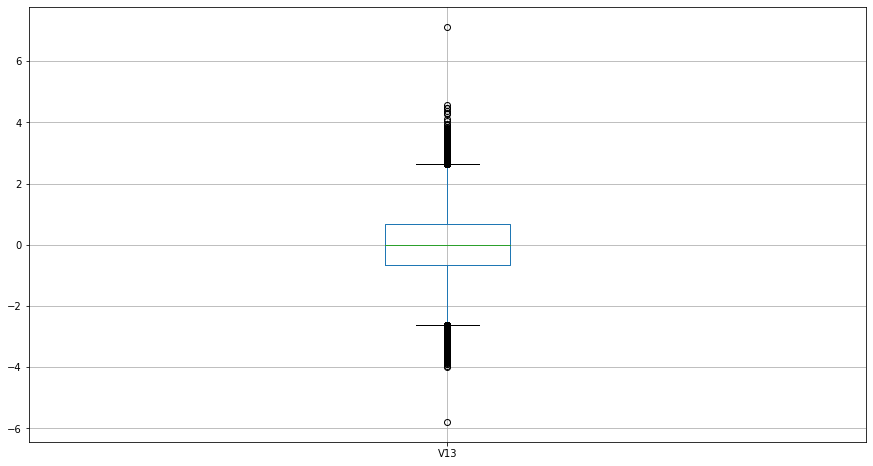

In [37]:
%%time
plt.figure(figsize=(15,8))
cc_df.boxplot(column='V13')

CPU times: user 35.6 ms, sys: 27 µs, total: 35.6 ms
Wall time: 34.6 ms


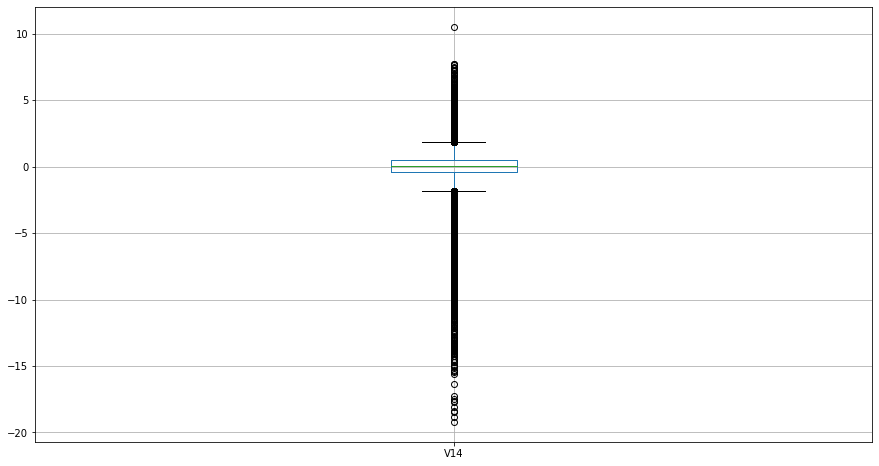

In [38]:
%%time
plt.figure(figsize=(15,8))
cc_df.boxplot(column='V14')

CPU times: user 32.7 ms, sys: 1.06 ms, total: 33.7 ms
Wall time: 32.8 ms


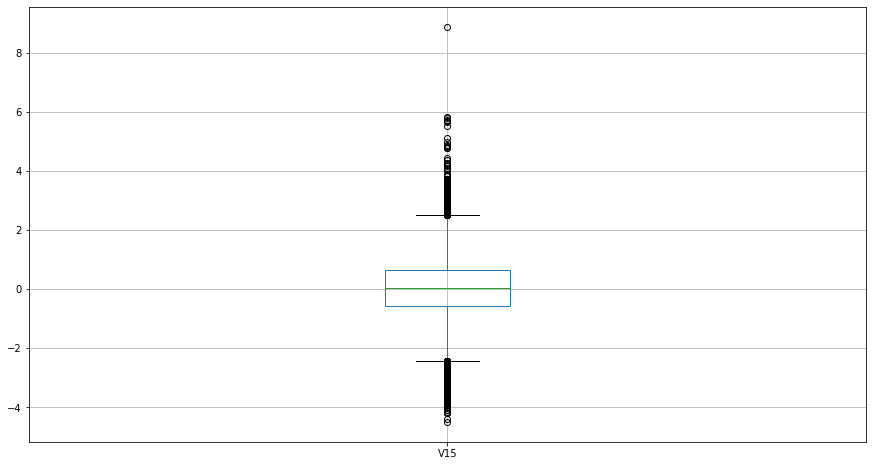

In [39]:
%%time
plt.figure(figsize=(15,8))
cc_df.boxplot(column='V15')

CPU times: user 36 ms, sys: 2.96 ms, total: 38.9 ms
Wall time: 37.4 ms


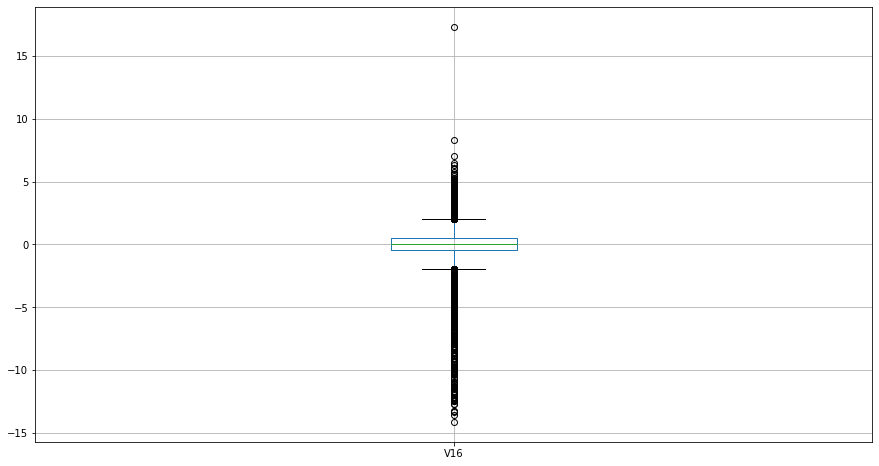

In [40]:
%%time
plt.figure(figsize=(15,8))
cc_df.boxplot(column='V16')

CPU times: user 31.4 ms, sys: 2.91 ms, total: 34.3 ms
Wall time: 32.2 ms


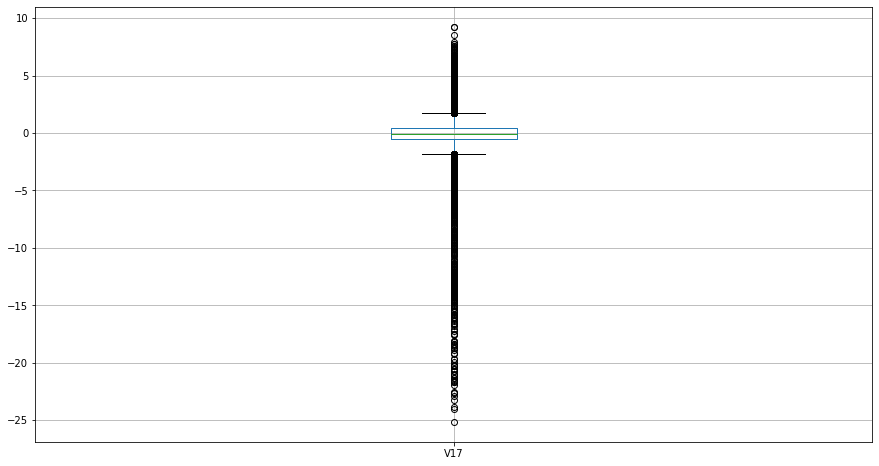

In [41]:
%%time
plt.figure(figsize=(15,8))
cc_df.boxplot(column='V17')

CPU times: user 34.5 ms, sys: 2.19 ms, total: 36.7 ms
Wall time: 34.7 ms


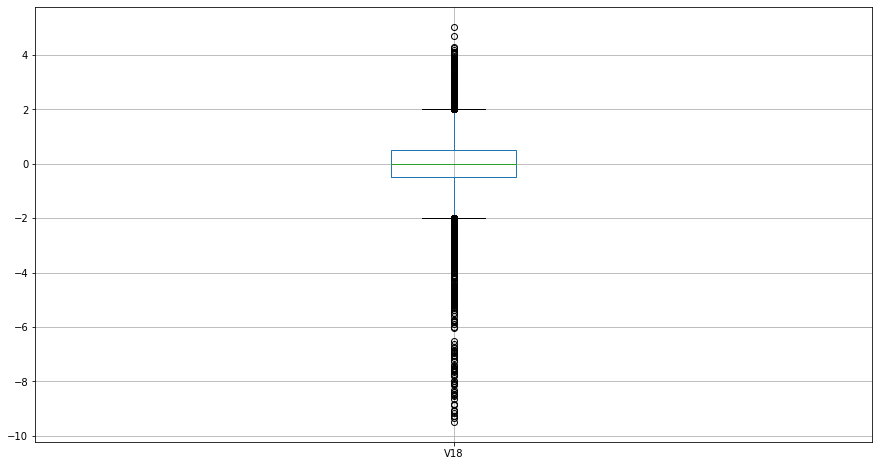

In [42]:
%%time
plt.figure(figsize=(15,8))
cc_df.boxplot(column='V18')

CPU times: user 34.9 ms, sys: 1.08 ms, total: 35.9 ms
Wall time: 34.9 ms


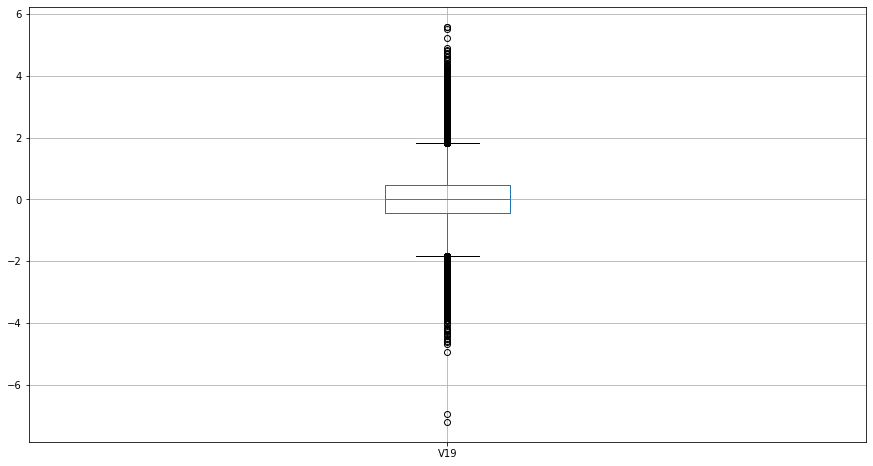

In [43]:
%%time
plt.figure(figsize=(15,8))
cc_df.boxplot(column='V19')

CPU times: user 34.9 ms, sys: 2.1 ms, total: 37 ms
Wall time: 35.5 ms


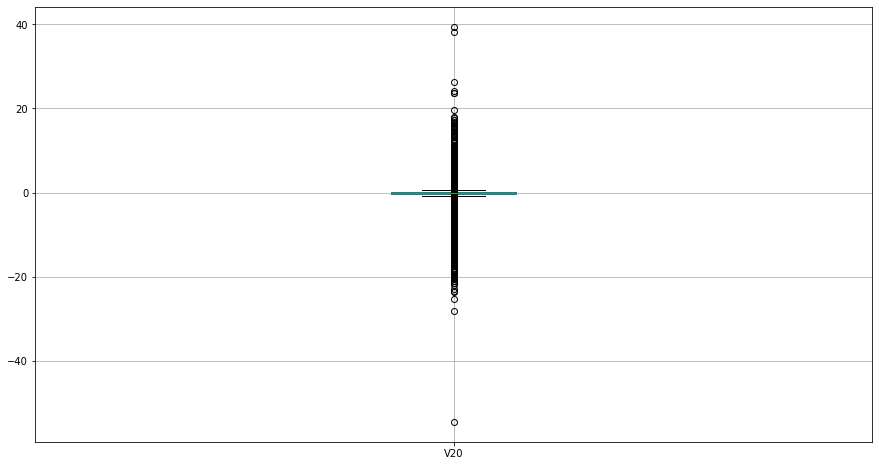

In [44]:
%%time
plt.figure(figsize=(15,8))
cc_df.boxplot(column='V20')

CPU times: user 36 ms, sys: 1.1 ms, total: 37.1 ms
Wall time: 36.2 ms


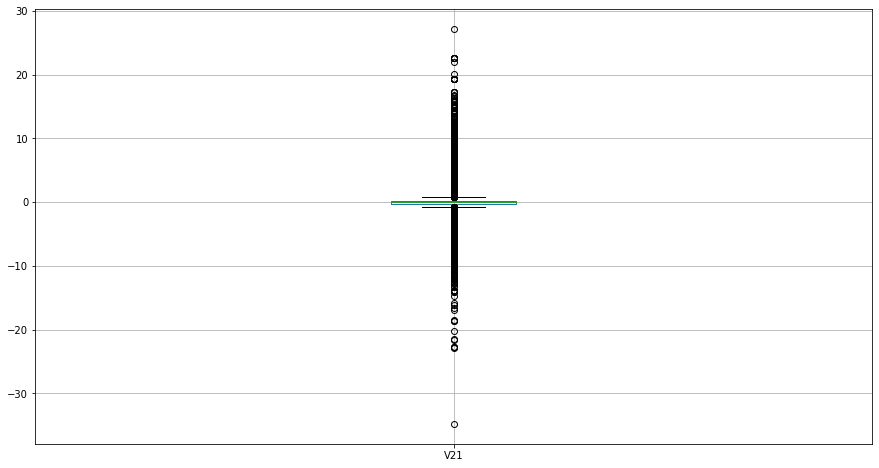

In [45]:
%%time
plt.figure(figsize=(15,8))
cc_df.boxplot(column='V21')

CPU times: user 135 ms, sys: 2.45 ms, total: 137 ms
Wall time: 130 ms


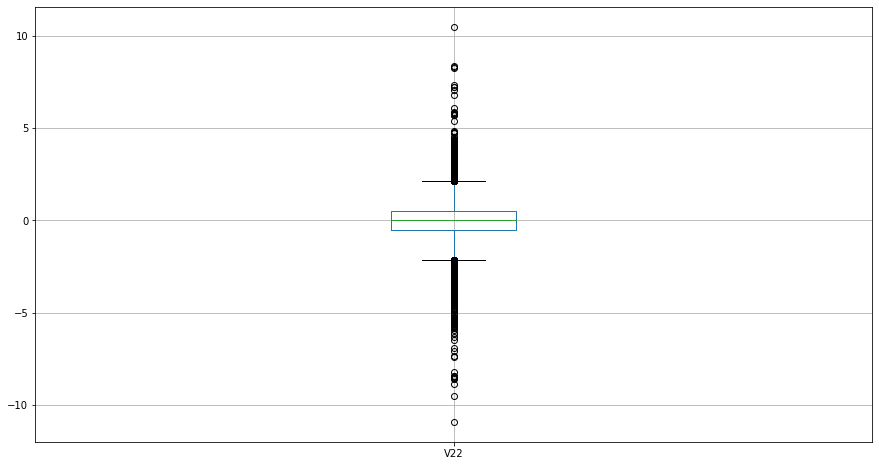

In [46]:
%%time
plt.figure(figsize=(15,8))
cc_df.boxplot(column='V22')

CPU times: user 35.2 ms, sys: 114 µs, total: 35.3 ms
Wall time: 34.1 ms


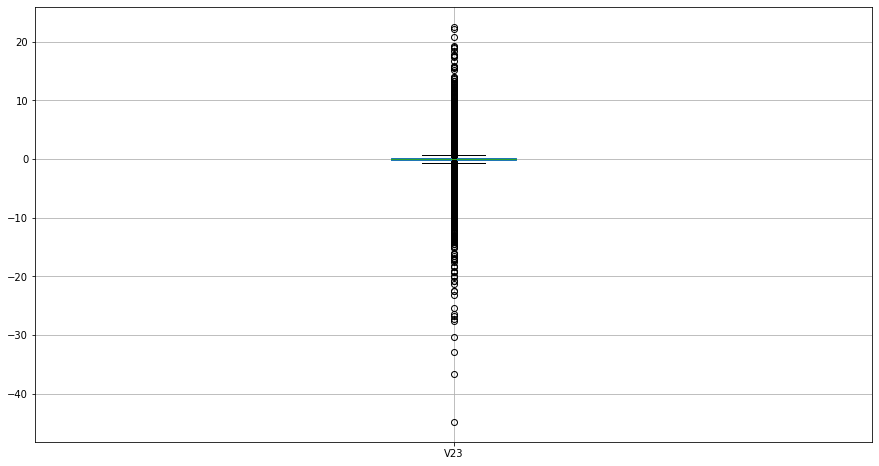

In [47]:
%%time
plt.figure(figsize=(15,8))
cc_df.boxplot(column='V23')

CPU times: user 32.6 ms, sys: 3.06 ms, total: 35.6 ms
Wall time: 34 ms


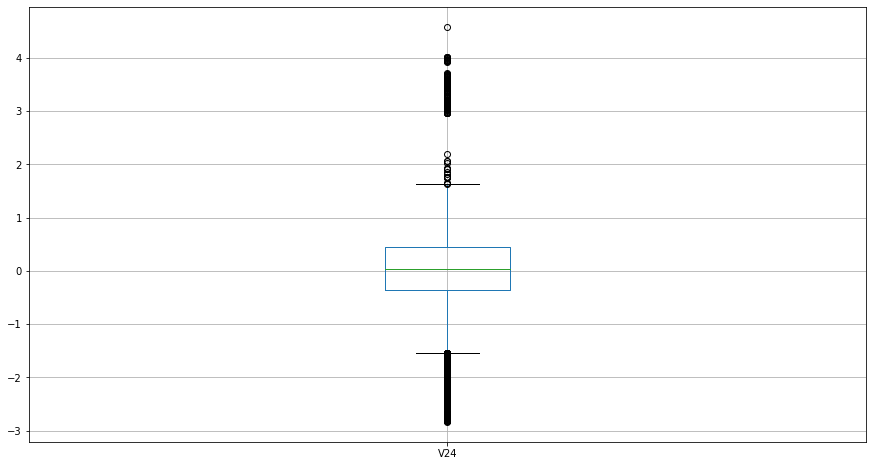

In [48]:
%%time
plt.figure(figsize=(15,8))
cc_df.boxplot(column='V24')

CPU times: user 34.6 ms, sys: 2.05 ms, total: 36.7 ms
Wall time: 35.2 ms


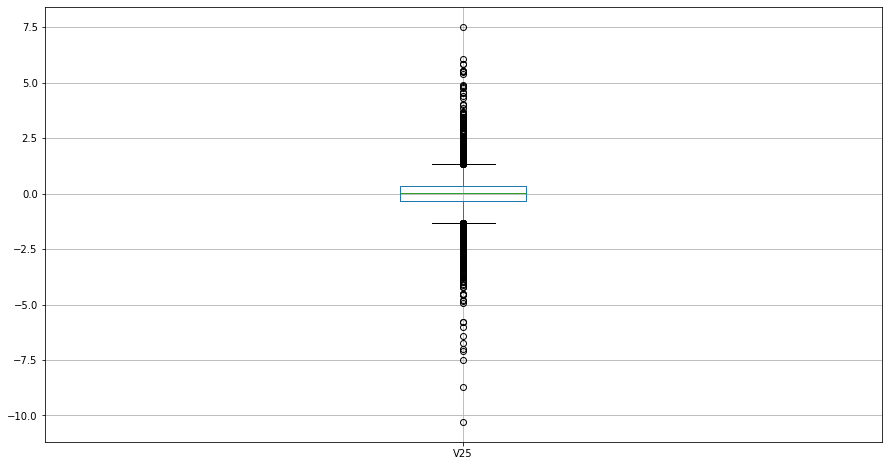

In [49]:
%%time
plt.figure(figsize=(15,8))
cc_df.boxplot(column='V25')

CPU times: user 31 ms, sys: 0 ns, total: 31 ms
Wall time: 30.9 ms


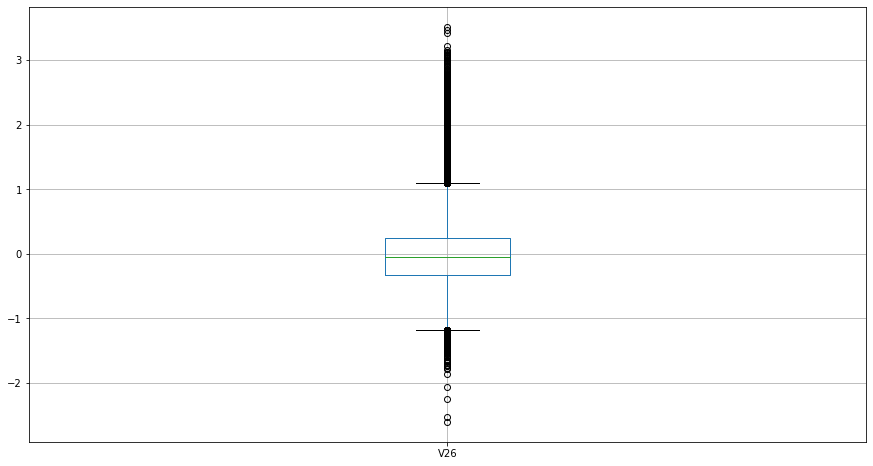

In [50]:
%%time
plt.figure(figsize=(15,8))
cc_df.boxplot(column='V26')

CPU times: user 35.5 ms, sys: 3.04 ms, total: 38.5 ms
Wall time: 36.8 ms


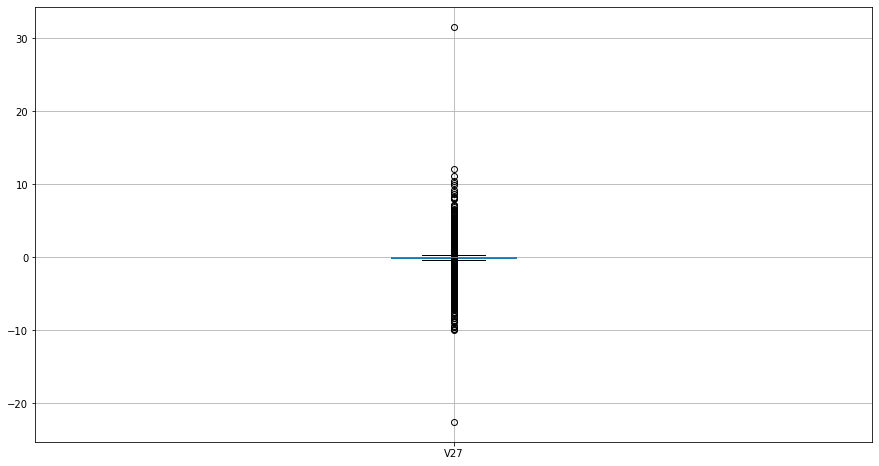

In [51]:
%%time
plt.figure(figsize=(15,8))
cc_df.boxplot(column='V27')

CPU times: user 38.1 ms, sys: 2.25 ms, total: 40.3 ms
Wall time: 37.8 ms


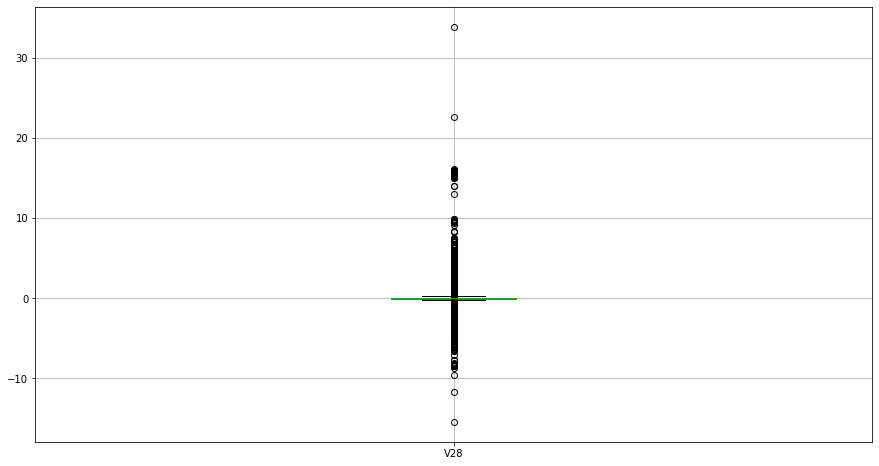

In [52]:
%%time
plt.figure(figsize=(15,8))
cc_df.boxplot(column='V28')

CPU times: user 56.3 ms, sys: 1.22 ms, total: 57.5 ms
Wall time: 56.5 ms


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


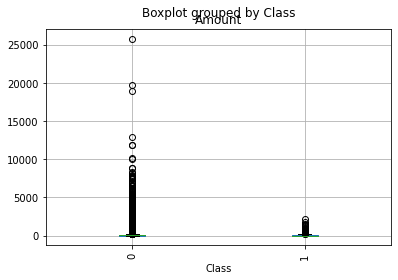

In [53]:
%%time
cc_df.boxplot(column='Amount', by='Class',rot=90);

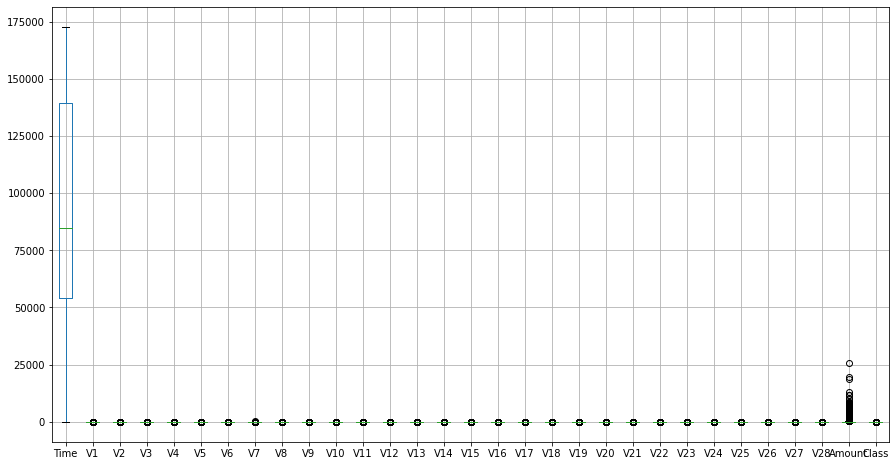

In [54]:
plt.figure(figsize=(15,8))
cc_df.boxplot()

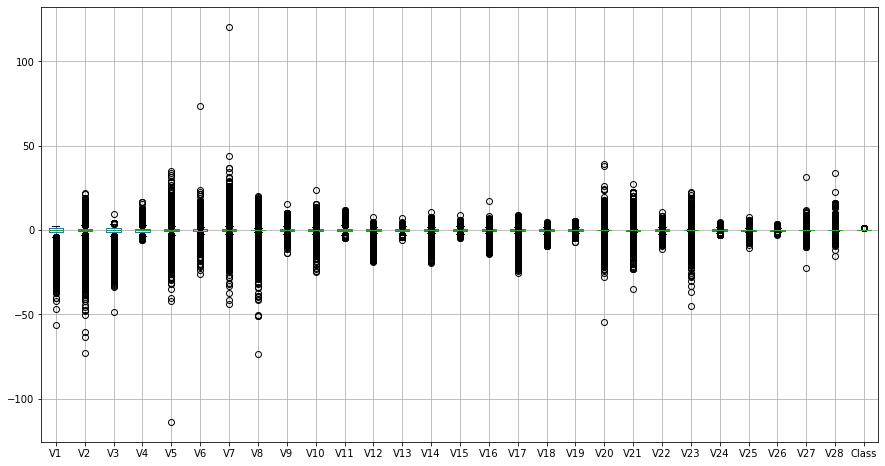

In [55]:
temp_df = cc_df.drop(columns=['Time','Amount'])
plt.figure(figsize=(15,8))
temp_df.boxplot()

## Building & Testing ML Models

### Preparing Data for ML

In [56]:
cc_df.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


#### Preparing Train/Test Sets

In [57]:
X = cc_df.drop(columns=['Class'])
y = cc_df['Class']

In [58]:
y.value_counts(normalize=True)

0    0.998333
1    0.001667
Name: Class, dtype: float64

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [89]:
X_train.shape

(212794, 30)

In [90]:
X_test.shape

(70932, 30)

In [60]:
balanced_cc_df = X_train.copy()

#### Checking Class Balance

In [61]:
y_train.value_counts(normalize=True)

0    0.998304
1    0.001696
Name: Class, dtype: float64

In [62]:
balanced_cc_df['Class'] = y_train

#### Balancing Trainning Data

In [63]:
fraud = y_train == 1
genuine = y_train == 0

rows_needed = np.abs(fraud.sum() - genuine.sum())
new_rows = balanced_cc_df[fraud].sample(rows_needed, replace=True)

balanced_cc_df = pd.concat((balanced_cc_df, new_rows))

In [64]:
balanced_cc_df['Class'].value_counts(normalize = True)

1    0.5
0    0.5
Name: Class, dtype: float64

In [65]:
X_train_balanced = balanced_cc_df.drop(columns='Class')
y_train_balanced = balanced_cc_df['Class']

#### Creating Eval Function

In [87]:
def eval(model, modelName):
  print(f'\nTrain Evaluation Result for {modelName}:\n')
  plot_confusion_matrix(model, X_train_balanced, y_train_balanced, values_format='.5g')
  plt.show()
  print(f'\n{classification_report(y_train_balanced, model.predict(X_train_balanced))}')
  print(f'\nTest Evaluation Result for {modelName}:\n')
  plot_confusion_matrix(model, X_test, y_test, values_format='.5g')
  plt.show()
  print(f'\n{classification_report(y_test, model.predict(X_test))}')

In [67]:
scaler = StandardScaler()

### Testing ML Models

#### Random Forest Classifier

##### Standard Model

In [68]:
%%time 

rf = RandomForestClassifier()
rf_pipe = make_pipeline(scaler, rf)
rf_pipe.fit(X_train_balanced, y_train_balanced);

CPU times: user 2min 8s, sys: 181 ms, total: 2min 8s
Wall time: 2min 7s



Train Evaluation Result for : Default Random Forest Classifier:



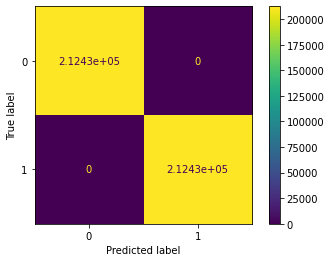


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    212433
           1       1.00      1.00      1.00    212433

    accuracy                           1.00    424866
   macro avg       1.00      1.00      1.00    424866
weighted avg       1.00      1.00      1.00    424866


Test Evaluation Result for : Default Random Forest Classifier:



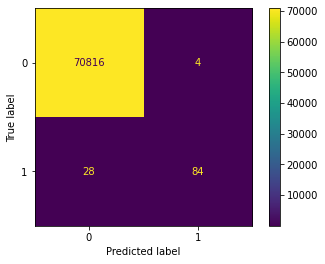


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       0.95      0.75      0.84       112

    accuracy                           1.00     70932
   macro avg       0.98      0.87      0.92     70932
weighted avg       1.00      1.00      1.00     70932



In [69]:
eval(rf_pipe, 'Default Random Forest Classifier')

##### Tuned Model

In [95]:
RandomForestClassifier()

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [101]:
%%time

rf_params = {'randomforestclassifier__max_depth' : [5, None],
             'randomforestclassifier__max_features' : ['auto', 'sqrt'],
             'randomforestclassifier__n_jobs' : [mp.cpu_count()]}

rf_tuned = GridSearchCV(rf_pipe, rf_params)
rf_tuned.fit(X_train_balanced, y_train_balanced)

CPU times: user 3min 53s, sys: 1.72 s, total: 3min 55s
Wall time: 11min 14s



Train Evaluation Result for Tuned Random Forest Classifier:



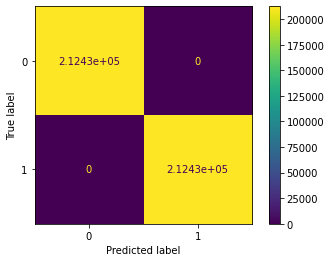


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    212433
           1       1.00      1.00      1.00    212433

    accuracy                           1.00    424866
   macro avg       1.00      1.00      1.00    424866
weighted avg       1.00      1.00      1.00    424866


Test Evaluation Result for Tuned Random Forest Classifier:



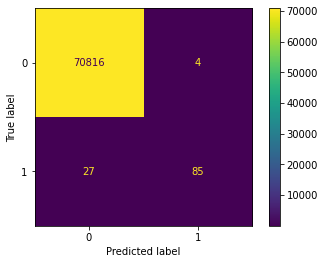


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       0.96      0.76      0.85       112

    accuracy                           1.00     70932
   macro avg       0.98      0.88      0.92     70932
weighted avg       1.00      1.00      1.00     70932



In [102]:
eval(rf_tuned, 'Tuned Random Forest Classifier')

In [103]:
rf_tuned.best_params_

{'randomforestclassifier__max_depth': None,
 'randomforestclassifier__max_features': 'sqrt',
 'randomforestclassifier__n_jobs': 4}

#### XGBoost

##### Standard Model

In [104]:
%%time

xg = XGBClassifier()
xg_pipe = make_pipeline(scaler, xg)
xg_pipe.fit(X_train_balanced, y_train_balanced)

CPU times: user 1min 13s, sys: 98.1 ms, total: 1min 13s
Wall time: 1min 13s



Train Evaluation Result for Default XGBoost Classifier:



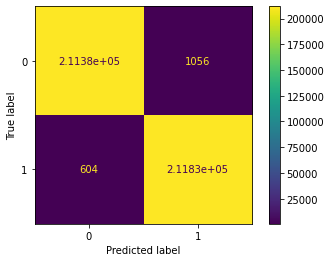


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    212433
           1       1.00      1.00      1.00    212433

    accuracy                           1.00    424866
   macro avg       1.00      1.00      1.00    424866
weighted avg       1.00      1.00      1.00    424866


Test Evaluation Result for Default XGBoost Classifier:



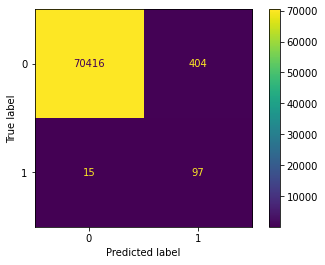


              precision    recall  f1-score   support

           0       1.00      0.99      1.00     70820
           1       0.19      0.87      0.32       112

    accuracy                           0.99     70932
   macro avg       0.60      0.93      0.66     70932
weighted avg       1.00      0.99      1.00     70932



In [105]:
eval(xg_pipe, 'Default XGBoost Classifier')

##### Tuned Model

In [84]:
%%time

xg_params = {'xgbclassifier__tree_method': ["gpu_hist"],
             'xgbclassifier__learning_rate' : [0.01, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.2, 0.3],
             'xgbclassifier__n_jobs' : [mp.cpu_count()],
             'xgbclassifier__max_depth' : [3, 5, 10, 15]}

xg_tuned = GridSearchCV(xg_pipe, xg_params)
xg_tuned.fit(X_train_balanced, y_train_balanced)

CPU times: user 3min 51s, sys: 10.5 s, total: 4min 2s
Wall time: 3min 30s



Train Evaluation Result for : Tuned XGBoost Classifier:



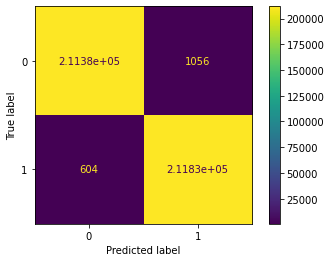


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    212433
           1       1.00      1.00      1.00    212433

    accuracy                           1.00    424866
   macro avg       1.00      1.00      1.00    424866
weighted avg       1.00      1.00      1.00    424866


Test Evaluation Result for : Tuned XGBoost Classifier:



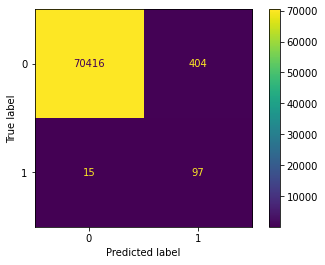


              precision    recall  f1-score   support

           0       1.00      0.99      1.00     70820
           1       0.19      0.87      0.32       112

    accuracy                           0.99     70932
   macro avg       0.60      0.93      0.66     70932
weighted avg       1.00      0.99      1.00     70932



In [85]:
eval(xg_pipe, 'Tuned XGBoost Classifier')

#### Light GBM

##### Standard Model

In [106]:
%%time

lg = LGBMClassifier()
lg_pipe = make_pipeline(scaler, lg)
lg_pipe.fit(X_train_balanced, y_train_balanced)

CPU times: user 10.2 s, sys: 33.9 ms, total: 10.2 s
Wall time: 10.2 s



Train Evaluation Result for Default LightGBM Classifier:



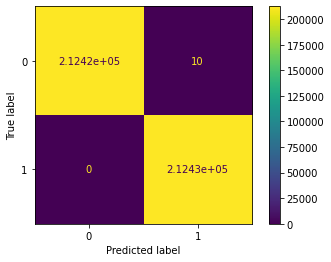


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    212433
           1       1.00      1.00      1.00    212433

    accuracy                           1.00    424866
   macro avg       1.00      1.00      1.00    424866
weighted avg       1.00      1.00      1.00    424866


Test Evaluation Result for Default LightGBM Classifier:



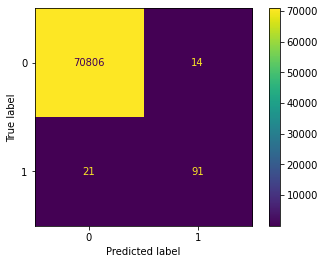


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       0.87      0.81      0.84       112

    accuracy                           1.00     70932
   macro avg       0.93      0.91      0.92     70932
weighted avg       1.00      1.00      1.00     70932



In [107]:
eval(lg_pipe, 'Default LightGBM Classifier')

##### Tuned Model

In [108]:
%%time

lg_params = {'lgbmclassifier__tree_method': ["gpu_hist"],
             'lgbmclassifier__learning_rate' : [0.01, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.2, 0.3],
             'lgbmclassifier__n_jobs' : [mp.cpu_count()],
             'lgbmclassifier__max_depth' : [3, 5, 10, 15]}

lg_tuned = GridSearchCV(lg_pipe, lg_params)
lg_tuned.fit(X_train_balanced, y_train_balanced)

CPU times: user 36min 45s, sys: 6.39 s, total: 36min 51s
Wall time: 10min 18s



Train Evaluation Result for Tuned LightGBM Classifier:



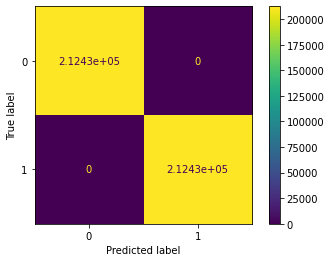


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    212433
           1       1.00      1.00      1.00    212433

    accuracy                           1.00    424866
   macro avg       1.00      1.00      1.00    424866
weighted avg       1.00      1.00      1.00    424866


Test Evaluation Result for Tuned LightGBM Classifier:



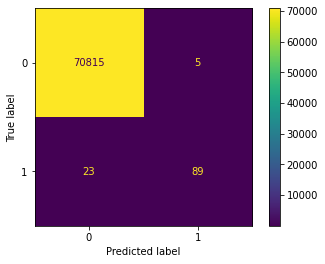


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       0.95      0.79      0.86       112

    accuracy                           1.00     70932
   macro avg       0.97      0.90      0.93     70932
weighted avg       1.00      1.00      1.00     70932



In [110]:
eval(lg_tuned, 'Tuned LightGBM Classifier')

### Performance Comparison


Train Evaluation Result for Tuned Random Forest Classifier:



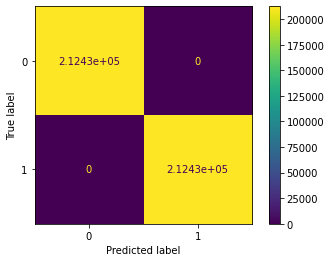


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    212433
           1       1.00      1.00      1.00    212433

    accuracy                           1.00    424866
   macro avg       1.00      1.00      1.00    424866
weighted avg       1.00      1.00      1.00    424866


Test Evaluation Result for Tuned Random Forest Classifier:



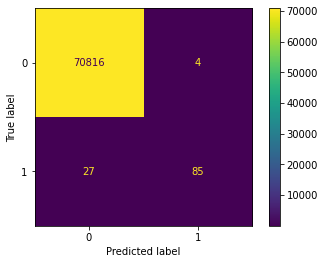


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       0.96      0.76      0.85       112

    accuracy                           1.00     70932
   macro avg       0.98      0.88      0.92     70932
weighted avg       1.00      1.00      1.00     70932


Train Evaluation Result for Tuned XGBoost Classifier:



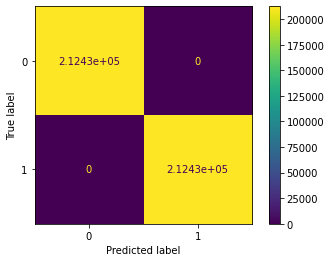


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    212433
           1       1.00      1.00      1.00    212433

    accuracy                           1.00    424866
   macro avg       1.00      1.00      1.00    424866
weighted avg       1.00      1.00      1.00    424866


Test Evaluation Result for Tuned XGBoost Classifier:



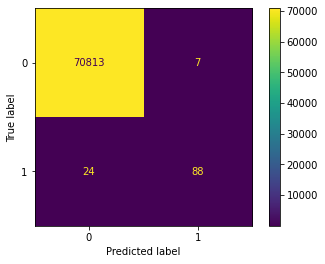


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       0.93      0.79      0.85       112

    accuracy                           1.00     70932
   macro avg       0.96      0.89      0.93     70932
weighted avg       1.00      1.00      1.00     70932


Train Evaluation Result for Tuned LightGBM Classifier:



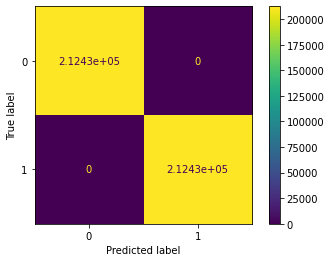


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    212433
           1       1.00      1.00      1.00    212433

    accuracy                           1.00    424866
   macro avg       1.00      1.00      1.00    424866
weighted avg       1.00      1.00      1.00    424866


Test Evaluation Result for Tuned LightGBM Classifier:



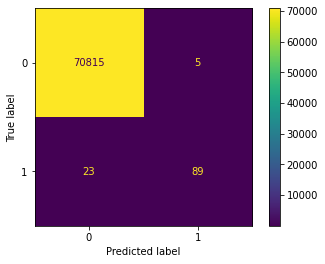


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       0.95      0.79      0.86       112

    accuracy                           1.00     70932
   macro avg       0.97      0.90      0.93     70932
weighted avg       1.00      1.00      1.00     70932



In [109]:
eval(rf_tuned, 'Tuned Random Forest Classifier')
eval(xg_tuned, 'Tuned XGBoost Classifier')
eval(lg_tuned, 'Tuned LightGBM Classifier')

> Based on the above results, I would choose the Tuned **LGBM Classifier** for production!